**Q1.** When is the best time of day, day of the week, and time of year to fly to minimise delays?

In [8]:
#Import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [9]:
#Read data
data_1993 = pd.read_csv("1993.csv.bz2")
data_1994 = pd.read_csv("1994.csv.bz2")

In [10]:
#View shape:
data_1993.shape, data_1994.shape

((5070501, 29), (5180048, 29))

In [11]:
#Take sample of the data:
data_1994 = data_1994.sample(5070501)

In [12]:
#Prepare data and view fields
datamerged = pd.concat([data_1993, data_1994])
datamerged.isna().sum()

Year                        0
Month                       0
DayofMonth                  0
DayOfWeek                   0
DepTime                125193
CRSDepTime                  0
ArrTime                147387
CRSArrTime                  0
UniqueCarrier               0
FlightNum                   0
TailNum              10141002
ActualElapsedTime      147387
CRSElapsedTime              0
AirTime              10141002
ArrDelay               147387
DepDelay               125193
Origin                      0
Dest                        0
Distance                29332
TaxiIn               10141002
TaxiOut              10141002
Cancelled                   0
CancellationCode     10141002
Diverted                    0
CarrierDelay         10141002
WeatherDelay         10141002
NASDelay             10141002
SecurityDelay        10141002
LateAircraftDelay    10141002
dtype: int64

In [13]:
#Cleanse data
datamerged.dropna(how="all", axis=1, inplace=True)
datamerged = datamerged.drop_duplicates()
datamerged.shape

(10141002, 19)

In [15]:
#Create new dataframe and Return mean for every time of day
deptime = datamerged[['CRSDepTime', 'ArrDelay', 'CRSArrTime','DepTime',
               'DepDelay']][datamerged['CRSDepTime'].notnull()]
deptime1 = datamerged.groupby("CRSDepTime").agg({"ArrDelay": "mean"}).reset_index()
deptime1

CRSDepTime   ArrDelay
0              1  -1.923469
1              2   0.526627
2              3   3.000000
3              4  -1.191781
4              5   1.074454
...          ...        ...
1244        2356  -5.588608
1245        2357   4.595455
1246        2358  12.454545
1247        2359   2.048406
1248        2400   6.000000

[1249 rows x 2 columns]

In [16]:
#Reformat the CRSDepTime field
from datetime import datetime
deptime1['CRSDepTime_format'] = deptime1['CRSDepTime'].apply(lambda row: str(int(row)).zfill(4) if row != 2400 else '0000')
deptime1.head()

CRSDepTime  ArrDelay CRSDepTime_format
0           1 -1.923469              0001
1           2  0.526627              0002
2           3  3.000000              0003
3           4 -1.191781              0004
4           5  1.074454              0005

In [17]:
deptime1['CRSDepTime_format'] = pd.to_datetime(deptime1['CRSDepTime_format'],  format="%H%M").dt.time
deptime1

CRSDepTime   ArrDelay CRSDepTime_format
0              1  -1.923469          00:01:00
1              2   0.526627          00:02:00
2              3   3.000000          00:03:00
3              4  -1.191781          00:04:00
4              5   1.074454          00:05:00
...          ...        ...               ...
1244        2356  -5.588608          23:56:00
1245        2357   4.595455          23:57:00
1246        2358  12.454545          23:58:00
1247        2359   2.048406          23:59:00
1248        2400   6.000000          00:00:00

[1249 rows x 3 columns]

In [18]:
#Find minimum mean arrival delay
deptime1.min(numeric_only=True)

CRSDepTime     1.0
ArrDelay     -28.0
dtype: float64

In [19]:
#Capture the time of day
timeofday = deptime1[deptime1['ArrDelay'] == -28.0]
timeofday

CRSDepTime  ArrDelay CRSDepTime_format
1242        2354     -28.0          23:54:00

In [20]:
#Put labels to time
def time(i): 
    if i >= 0 and i <=600: return 'Night'
    if i > 600 and i <=1200: return 'Morning'
    if i > 1200 and i <=1700: return 'Afternoon'
    if i > 1700 and i <=2400: return 'Evening'
    else: return 'Incorrect' 
deptime1['CRSDepTime_category']=deptime1['CRSDepTime'].apply(time) #apply conditions to departure
deptime1

CRSDepTime   ArrDelay CRSDepTime_format CRSDepTime_category
0              1  -1.923469          00:01:00               Night
1              2   0.526627          00:02:00               Night
2              3   3.000000          00:03:00               Night
3              4  -1.191781          00:04:00               Night
4              5   1.074454          00:05:00               Night
...          ...        ...               ...                 ...
1244        2356  -5.588608          23:56:00             Evening
1245        2357   4.595455          23:57:00             Evening
1246        2358  12.454545          23:58:00             Evening
1247        2359   2.048406          23:59:00             Evening
1248        2400   6.000000          00:00:00             Evening

[1249 rows x 4 columns]

In [21]:
#Min arrdelay for each time category
deptime1 = deptime1[deptime1['CRSDepTime_category'] != 'Incorrect']
timeofdaymin = deptime1.groupby("CRSDepTime_category").agg({"ArrDelay": "mean"}).reset_index()
timeofdaymin

CRSDepTime_category  ArrDelay
0           Afternoon  6.955023
1             Evening  8.624811
2             Morning  3.281491
3               Night  0.149357

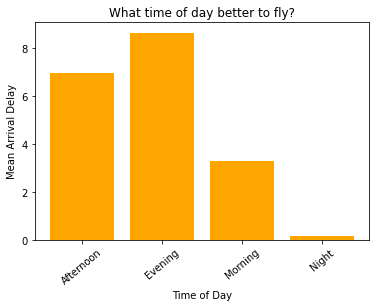

In [27]:
#PLot a chart
plt.bar(timeofdaymin["CRSDepTime_category"], timeofdaymin["ArrDelay"], color="orange")
plt.title("What time of day better to fly?")
plt.xticks(rotation=40)
plt.xlabel("Time of Day")
plt.ylabel("Mean Arrival Delay")
plt.show()

In [29]:
#Return mean for every day of week
dayofweek = datamerged.groupby("DayOfWeek").agg({"ArrDelay": "mean"}).reset_index()
dayofweek['DayOfWeek'] = dayofweek['DayOfWeek'].map({1:'Monday',2:'Tuesday', #make the axis human-readable - decode
                                       3:'Wednesday',4:'Thursday',5:'Friday',
                                       6:'Saturday',7:'Sunday'}).astype('str') 
dayofweek

DayOfWeek  ArrDelay
0     Monday  5.176812
1    Tuesday  4.740758
2  Wednesday  6.580647
3   Thursday  7.022160
4     Friday  7.026576
5   Saturday  3.122241
6     Sunday  4.590843

In [47]:
#Find the minimum mean arrival delay
mindelayday = dayofweek['ArrDelay'].min()
mindelayday

3.1229288565234983

In [48]:
#Find the corresponding row
result = dayofweek[dayofweek['ArrDelay'] == mindelayday]
result

DayOfWeek  ArrDelay
5  Saturday  3.122929

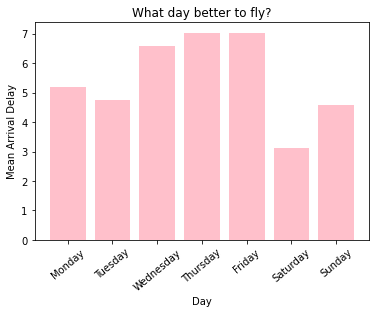

In [30]:
#Plot a graph
plt.bar(dayofweek["DayOfWeek"], dayofweek["ArrDelay"], color="pink")
plt.title("What day better to fly?")
plt.xticks(rotation=40)
plt.xlabel("Day")
plt.ylabel("Mean Arrival Delay")
plt.show()

In [31]:
#Group months by mean arrival delay time
month = datamerged.groupby("Month").agg({"ArrDelay": "mean"}).reset_index()
month['Month'] = month['Month'].map({1:'January',2:'February',3:'March',4:'April',5:'May', #decode again
                               6:'June',7:'July',8:'August',9:'September',10:'October',
                               11:'November',12:'December'})
month

Month  ArrDelay
0     January  8.560585
1    February  8.330873
2       March  6.955223
3       April  5.294728
4         May  2.482664
5        June  5.954097
6        July  5.400619
7      August  4.760211
8   September  2.934443
9     October  4.123175
10   November  5.557409
11   December  6.244753

In [32]:
#Find the minimum mean arrival delay in month
mindelaymonth = month['ArrDelay'].min()
mindelaymonth

2.4826638172795312

In [33]:
#Find the corresponding row
resultmonth = month[month['ArrDelay'] == mindelaymonth]
resultmonth

Month  ArrDelay
4   May  2.482664

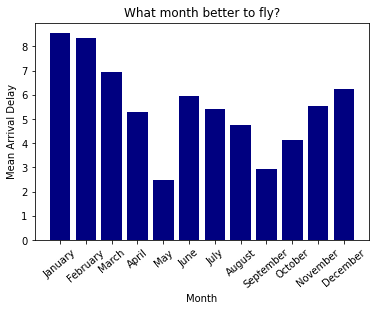

In [36]:
#Plot a graph
plt.bar(month["Month"], month["ArrDelay"], color="navy")
plt.title("What month better to fly?")
plt.xticks(rotation=40)
plt.xlabel("Month")
plt.ylabel("Mean Arrival Delay")
plt.show()